# Librerias

In [11]:
'''Se importan las debidas librerías para el modelamiento de regresion lineal '''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from scipy import stats

# Dataset

In [2]:
'''Carga y lectura del dataset Clima mediante la libreía Pandas '''
df = pd.read_csv('weather1.csv')
df.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [3]:
'''Conteo de registros en el dataset'''
df.shape

(16743, 14)

# Relación entre una variable dependiente (Y) y una o más variables independientes (X)

In [4]:
'''Variables predictoras (Independiente) para el modelamiento'''
X = df['Data.Temperature.Min Temp'].values.reshape(-1,1)
print("Entradas: ", X)

'''Variable de resultado (Dependiente)'''
y = df['Data.Temperature.Max Temp'].values.reshape(-1,1)
print("Objetivo: ", y)

Entradas:  [[32]
 [31]
 [41]
 ...
 [ 4]
 [13]
 [ 8]]
Objetivo:  [[46]
 [47]
 [51]
 ...
 [29]
 [31]
 [34]]


# División de conjuntos de datos

In [5]:
'''Se divide 70% para entrenamiento y 30% para prueba'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
'''Datos divididos'''
print(X_train)
print(y_train)

[[45]
 [58]
 [54]
 ...
 [50]
 [53]
 [24]]
[[65]
 [86]
 [69]
 ...
 [78]
 [81]
 [52]]


# Entrenamiento del modelo

In [6]:
'''Se define al modelo mencinando el tipo de Regresion en est caso Lineal'''
regressor = LinearRegression() 
'''Entrenamiento del modelo RL'''
regressor.fit(X_train, y_train) #Entrena el algoritmo

LinearRegression()

# Predicción

In [7]:
''' Predicciones para la precisión del algoritmo '''
y_pred = regressor.predict(X_test)

## Precisión del algoritmo en sus predicciones

In [8]:
''' Predicciones sobre los datos de  prueba'''
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,40,46.730809
1,81,80.070401
2,68,62.420029
3,65,45.750233
4,57,64.381181
...,...,...
5018,89,85.953859
5019,91,75.167520
5020,34,31.041589
5021,79,76.148096


# Gráfica de Regresión Líneal

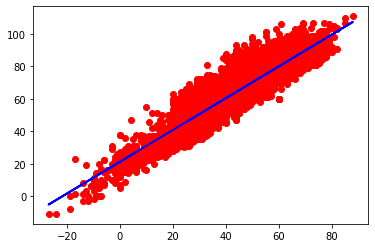

In [9]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

### Cálculos de Intercepción y Pendiente

In [12]:
#Intersección de la línea de regresión.
print("Intersección LR: ", regressor.intercept_)
#Para obtener la pendiente
print("Pendiente: ",regressor.coef_)

Intersección LR:  [21.23582654]
Pendiente:  [[0.98057624]]
Error Absoluto Medio: 5.984086878747033
Error Cuadratico Medio: 59.34107419755378
Raíz del error cuadrático medio: 7.703315792407435
